In [1]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 32.46 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [2]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.7/236.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 110.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into 

In [3]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 42.3 MB/s eta 0:00:00


In [1]:
!nvidia-smi

Wed May 15 12:23:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   39C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:

import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import matplotlib.patches as mpatches
from pywaffle import Waffle

ModuleNotFoundError: No module named 'official'

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

In [3]:
import gzip
import json
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)


file_path = '/content/drive/MyDrive/BertReviewAnalysis/review-Kansas_10.json.gz'

json_objects = []

for json_obj in parse(file_path):
    json_objects.append(json_obj)

df = pd.DataFrame(json_objects)


In [4]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,110174851715143039572,Hannah Johnston,1603469475914,4,Really cute store. All the staff are lovely. T...,None,None,0x87bf03987b89d0c3:0x9b3d137e7bfc045a
1,109469133033675413034,Flint Blankenship,1628280826510,4,Well...... The place is a 5-Star..... BUT..,None,None,0x87bf03987b89d0c3:0x9b3d137e7bfc045a
2,101132804334372412402,Sheryl Fields,1511648800146,2,Normally we really like stopping in and shoppi...,None,"{'time': 1511695775965, 'text': 'So sorry to d...",0x87bf03987b89d0c3:0x9b3d137e7bfc045a
3,114573410811170173535,Robert Gragg,1572660533736,4,Nice selection of antiques collectables and ho...,None,"{'time': 1572693100906, 'text': 'Thank you for...",0x87bf03987b89d0c3:0x9b3d137e7bfc045a
4,117268927797389286107,Jan Swan,1603471293093,4,Nice stuff,None,None,0x87bf03987b89d0c3:0x9b3d137e7bfc045a


In [5]:
df.shape

(3080115, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080115 entries, 0 to 3080114
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 188.0+ MB


In [7]:
df = df[['user_id', 'text', 'rating']]

In [9]:
from sklearn.model_selection import train_test_split
df, remaining = train_test_split(df, random_state = 42, train_size = 0.3, stratify = df["rating"])  #using only 0.3% of the original data

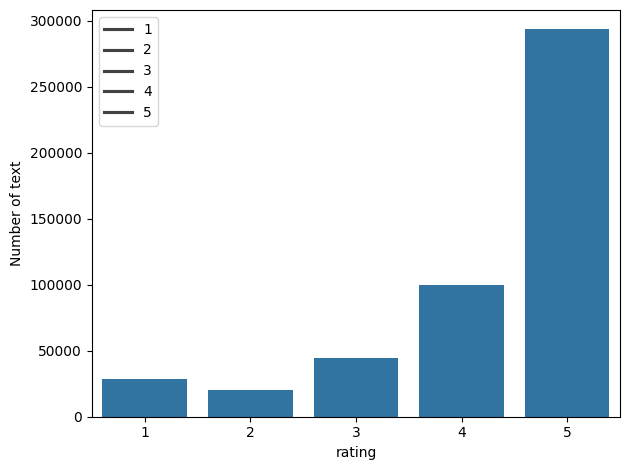

In [10]:
diff_of_gen = df.groupby(df['rating'])['text'].count().reset_index()

sns.barplot(x=diff_of_gen['rating'],y=diff_of_gen['text'])
plt.tight_layout()
plt.legend(diff_of_gen['rating'])
plt.ylabel('Number of text')
plt.show()

In [13]:
missing_values = df['text'].isnull().sum()

if missing_values > 0:
    df.dropna(subset=['text'], inplace=True)
    print(f"Dropped {missing_values} rows with missing 'text' values.")

if 'text' in df.columns:
    text_by_rating = {}
    for rating in range(1, 6):
        text_by_rating[rating] = ' '.join(df[df['rating'] == rating]['text'])
    for rating, text in text_by_rating.items():
        print(f"Text for rating {rating}:\n{text[:100]}...")
else:
    print("The 'text' column does not exist in the DataFrame.")

Dropped 437343 rows with missing 'text' values.
Text for rating 1:
Another FAIL. Always messing up my order. Slower then normal service. Staff stood around a while the...
Text for rating 2:
One of the slowest fast food restaurants I have ever been to. It consistently takes over 10 mins to ...
Text for rating 3:
I went to school here in the 90s when it was Cherokee Elementary. Sad because they are closing this ...
Text for rating 4:
Extremely fast service. Meal was great! Decent food for the price. Glad this exists, but they really...
Text for rating 5:
Fast friendly service with great food. Absolutely amazing food absolutely worth it . I used to go to...


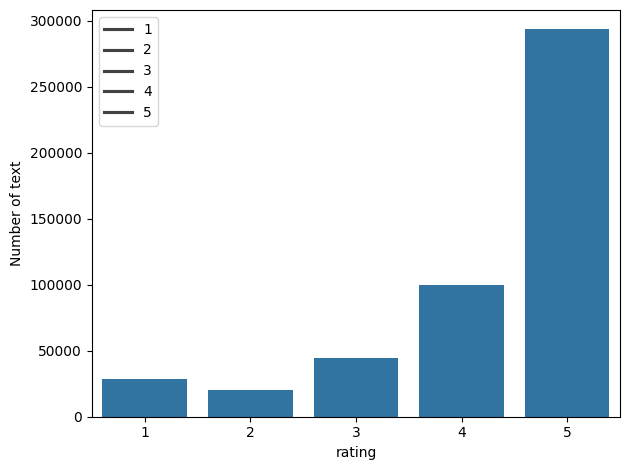

In [14]:
diff_of_gen = df.groupby(df['rating'])['text'].count().reset_index()
sns.barplot(x=diff_of_gen['rating'],y=diff_of_gen['text'])
plt.tight_layout()
plt.legend(diff_of_gen['rating'])
plt.ylabel('Number of text')
plt.show()

In [15]:
df.shape

(486691, 3)

In [16]:
text_1 = ' '.join(df[df['rating']==1]['text'])[0:df.shape[0]]
text_2= ' '.join(df[df['rating']==2]['text'])[0:df.shape[0]]
text_3 = ' '.join(df[df['rating']==3]['text'])[0:df.shape[0]]
text_4 = ' '.join(df[df['rating']==4]['text'])[0:df.shape[0]]
text_5 = ' '.join(df[df['rating']==5]['text'])[0:df.shape[0]]

In [17]:
text_cloud_1 = WordCloud().generate(text_1)
text_cloud_2= WordCloud().generate(text_2)
text_cloud_3= WordCloud().generate(text_3)
text_cloud_4= WordCloud().generate(text_4)
text_cloud_5= WordCloud().generate(text_5)

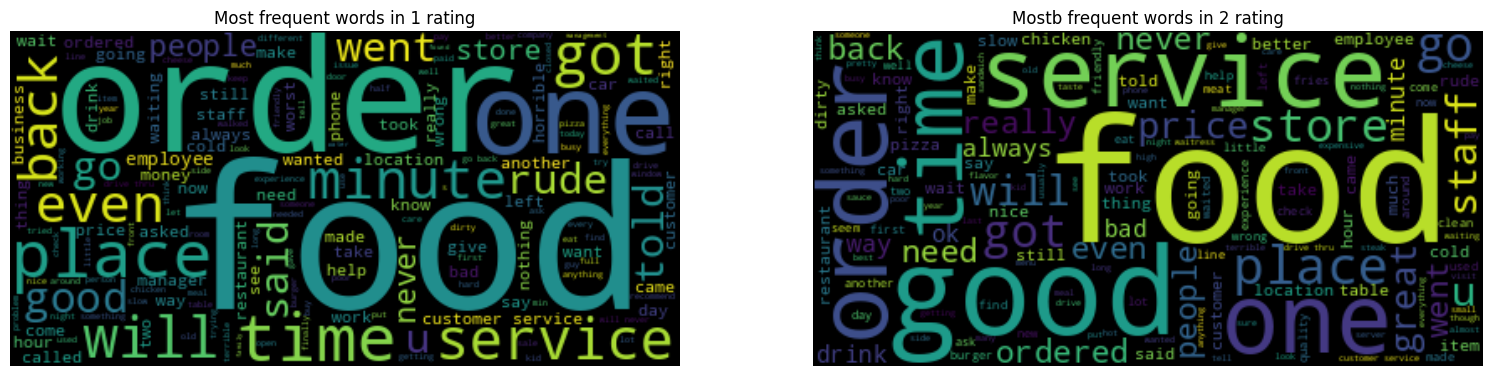

In [18]:
plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
plt.title('Most frequent words in 1 rating')
plt.imshow(text_cloud_1, interpolation='bilinear')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Mostb frequent words in 2 rating')
plt.imshow(text_cloud_2, interpolation='bilinear')
plt.axis('off')

plt.show()

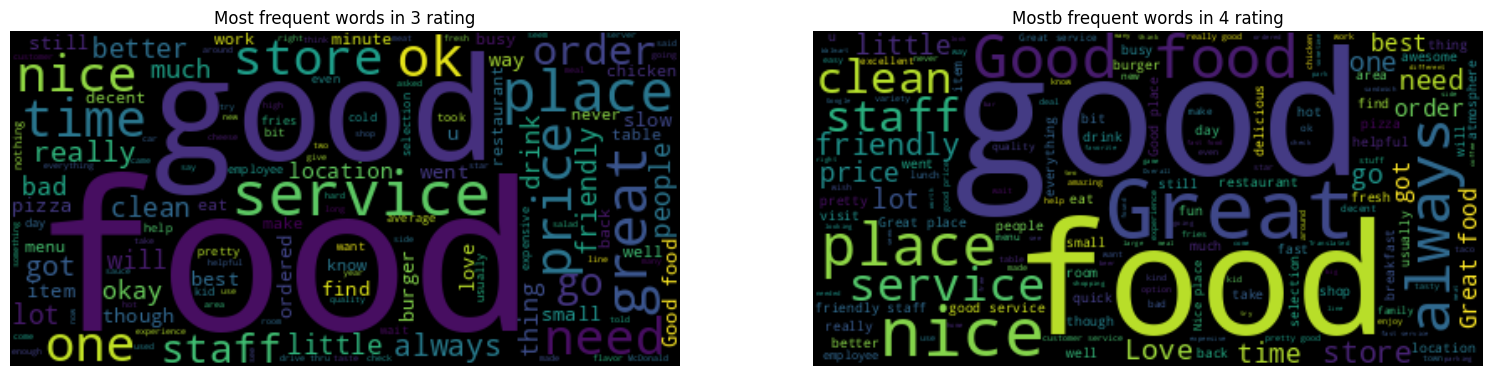

In [19]:
plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
plt.title('Most frequent words in 3 rating')
plt.imshow(text_cloud_3, interpolation='bilinear')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Mostb frequent words in 4 rating')
plt.imshow(text_cloud_4, interpolation='bilinear')
plt.axis('off')

plt.show()

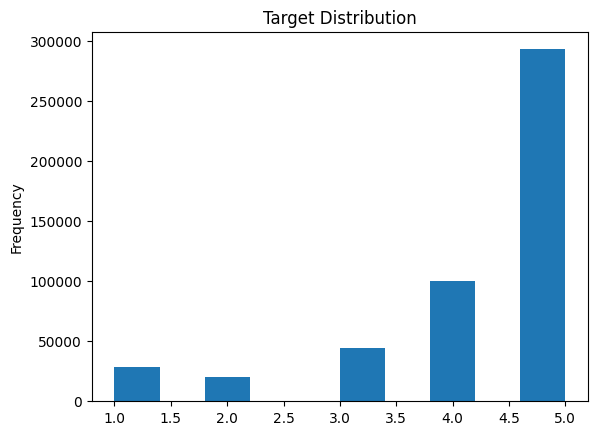

In [20]:
df.rating.plot(kind='hist', title = 'Target Distribution');

# Data Preprocessing

In [21]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <=2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

In [22]:
df['sentiment'] = df.rating.apply(to_sentiment)

In [23]:
class_names = ['negative','neutral','positive']

In [24]:
df.head()

,user_id,text,rating,sentiment
619168,115234133247617433757,Extremely fast service. Meal was great!,4,2
3044953,100510469343202004867,Fast friendly service with great food.,5,2
184969,108411851823056113630,Absolutely amazing food absolutely worth it . ...,5,2
445029,106105783922758017696,"I love the Family EyeCare Center, they are fr...",5,2
317114,104375254911798683318,"Dr. Warwick is absolutely wonderful, as well a...",5,2


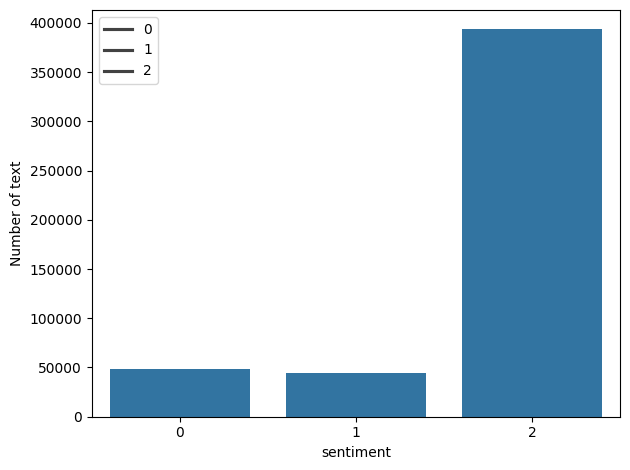

In [25]:
diff_of_gen = df.groupby(df['sentiment'])['text'].count().reset_index()

sns.barplot(x=diff_of_gen['sentiment'],y=diff_of_gen['text'])
plt.tight_layout()
plt.legend(diff_of_gen['sentiment'])
plt.ylabel('Number of text')
plt.show()

In [27]:
train_df, remain = train_test_split(df, test_size=0.2, random_state=0)
validation_df, test_df = train_test_split(remain, test_size=0.5, random_state=0)

print(f'The size of training dataset is: {len(train_df)} samples')
print(f'The size of validation dataset is: {len(validation_df)} samples')
print(f'The size of test dataset is: {len(test_df)} samples')

The size of training dataset is: 389352 samples
The size of validation dataset is: 48669 samples
The size of test dataset is: 48670 samples


In [28]:
train_df

,user_id,text,rating,sentiment
1560695,113759559083860881389,Good time! Get there early for cosmic bowling ...,5,2
216151,110966979425860743485,"I did my first Drag race here, everyone was ve...",5,2
1587944,105776534450524523470,Great service!,4,2
822106,110878000951070502677,"Poor customer service. If you have an issue, ...",2,0
1440899,109218460310240288350,"Great place, great price",4,2
...,...,...,...,...
3007138,107641844246752088082,Very helpful,5,2
2350174,101158881028934604205,Good food and it's affordable,4,2
463039,102747507456850163702,An eclectic place with estate sale couches and...,5,2
729748,107131029681819225280,Average food. Sandwich was made sloppy. Kind o...,3,1


In [29]:
train_df = train_df.drop(columns=['rating'])
valid_df = validation_df.drop(columns=['rating'])

In [31]:
with tf.device('/device:GPU:0'):
    train_data = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['sentiment'].values))
    valid_data = tf.data.Dataset.from_tensor_slices((valid_df['text'].values, valid_df['sentiment'].values))
    for text,label in train_data.take(3):
        print(text)
        print(label)

tf.Tensor(b'Good time! Get there early for cosmic bowling or you will not get a lane. Long line', shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'I did my first Drag race here, everyone was very friendly and helpful! It was a great experience! FYI - if your ET is under 14s bring a helmet', shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'Great service!', shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)


In [33]:
print(len(train_data))
print(len(valid_data))

383970
164559


In [32]:
config = {'label_list' : [0, 1, 2], # Label categories
          'max_seq_length' : 150, # maximum length of (token) input sequences
          'train_batch_size' : 32,
          'learning_rate': 2e-5,
          'epochs':5,
          'optimizer': 'adam',
          'dropout': 0.5,
          'train_samples': len(train_data),
          'valid_samples': len(valid_data),
          'train_split':0.1,
          'valid_split': 0.01
         }

In [33]:
# Get BERT layer and tokenizer:
# All details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2

bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2',trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # checks if the bert layer we are using is uncased or not
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [34]:
# This provides a function to convert row to input features and label,
# this uses the classifier_data_lib which is a class defined in the tensorflow model garden we installed earlier
def create_feature(text, label, label_list=config['label_list'], max_seq_length=config['max_seq_length'], tokenizer=tokenizer):
    """
    converts the datapoint into usable features for BERT using the classifier_data_lib

    Parameters:
    text: Input text string
    label: label associated with the text
    label_list: (list) all possible labels
    max_seq_length: (int) maximum sequence length set for bert
    tokenizer: the tokenizer object instantiated by the files in model assets

    Returns:
    feature.input_ids: The token ids for the input text string
    feature.input_masks: The padding mask generated
    feature.segment_ids: essentially here a vector of 0s since classification
    feature.label_id: the corresponding label id from lable_list [0, 1] here

    """
    # since we only have 1 sentence for classification purpose, textr_b is None
    example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(),
                                            text_b = None,
                                            label = label.numpy())
    # since only 1 example, the index=0
    feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)

    return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [35]:
def create_feature_map(text, label):
    """
    A tensorflow function wrapper to apply the transformation on the dataset.
    Parameters:
    Text: the input text string.
    label: the classification ground truth label associated with the input string

    Returns:
    A tuple of a dictionary and a corresponding label_id with it. The dictionary
    contains the input_word_ids, input_mask, input_type_ids
    """
    input_ids, input_mask, segment_ids, label_id = tf.py_function(create_feature, inp=[text, label],
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
    max_seq_length = config['max_seq_length']

    # py_func doesn't set the shape of the returned tensors.
    input_ids.set_shape([max_seq_length])
    input_mask.set_shape([max_seq_length])
    segment_ids.set_shape([max_seq_length])
    label_id.set_shape([])

    x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
    return (x, label_id)

    # the final datapoint passed to the model is of the format a dictionary as x and labels.
    # the dictionary have keys which should obv match

In [36]:
# Now we will simply apply the transformation to our train and test datasets
with tf.device('/device:GPU:0'):
  # train
  train_data = (train_data.map(create_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)

                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(create_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

In [37]:
# train data spec, we can finally see the input datapoint is now converted to the BERT specific input tensor
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 150), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 150), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 150), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [38]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 150), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 150), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 150), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [39]:
def create_model():

    input_word_ids = tf.keras.layers.Input(shape=(config['max_seq_length'],), dtype=tf.int32,name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(config['max_seq_length'],), dtype=tf.int32, name="input_mask")
    input_type_ids = tf.keras.layers.Input(shape=(config['max_seq_length'],), dtype=tf.int32,name="input_type_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

    drop = tf.keras.layers.Dropout(config['dropout'])(pooled_output)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)

    model = tf.keras.Model(
      inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids},
      outputs=output)

    return model

In [40]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config['learning_rate']),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.PrecisionAtRecall(0.5),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 150)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                              

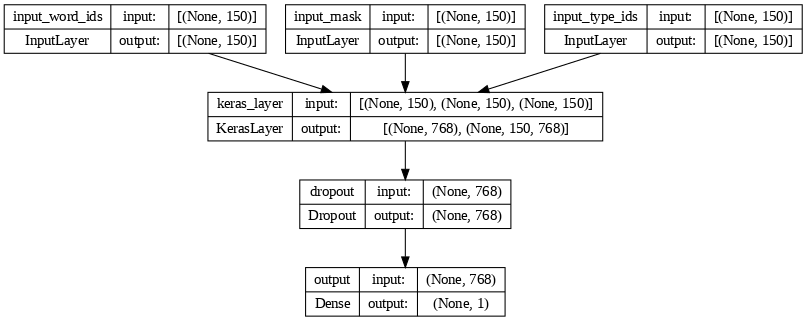

In [41]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76, )

In [1]:
my_callbacks = [callbacks.ModelCheckpoint('bert.h5', monitor='val_loss', save_best_only=True, verbose=2),
                callbacks.EarlyStopping(monitor='val_loss',  patience=5, verbose=2),
                callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=2)]
epochs = 5
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1,
                    callbacks = my_callbacks, )

NameError: name 'model' is not defined

# Evaluation

In [1]:
evaluation_results = model.evaluate(valid_data,return_dict=True)

NameError: name 'model' is not defined

In [ ]:
def create_graphs(history):
    train_accuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy'],
    train_losses = history.history['loss'],
    val_losses = history.history['val_loss']
    fig1 = plt.figure()
    plt.plot(train_accuracy, 'r', linewidth=3.0, marker='o')
    plt.plot(val_accuracy, 'b', linewidth=3.0, marker='o')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)
    plt.show()

    fig2 = plt.figure()
    plt.plot(train_losses, 'r', linewidth=3.0, marker='o')
    plt.plot(val_losses, 'b', linewidth=3.0, marker='o')
    plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)
    plt.show()

In [ ]:
create_graphs(history)